In [ ]:
# all the imports
# from IPython.core.display import HTML
# display(HTML("<style>pre { white-space: pre !important; }</style>"))


import pandas as pd
import matplotlib.pyplot as plt

import os
import glob

import numpy as np
#from ipynb.fs.full.AppProcessing import *
from itertools import zip_longest
import itertools as itertools

In [3]:
def tidyAppOutput(file, evenlyIndex = True, sec = False):
    """
    Tidies the App Output to better plot in the next steps. Removes meta data and sets the timestaps as index.
    Timestamp is in msec, if not desired it can be changed to seconds here. But this results in slightly 
    different visualization in the next steps 
    --------------------
    Parameter:
        file: A pandas dataframe created from in the original app format
        evenlyIndex (boolean, default = True): If False timestamp from App is used as index, 
                                                if True an evenly spaced (4ms) index is created and used instead 
                                                True as default as this improves the signal quality. See Git for comparison. 
        sec (boolean): If true msec are transformed into seconds
        
        Returns:
        file: cleaned up dataframe
        
    """
    file = file.iloc[1:]
    file.columns = file.iloc[0]
    file = file[1:].apply(pd.to_numeric, errors='ignore')
    # to convert index to float
    flt_ind = file.index[:].tolist()
    file.index = [float(i) for i in flt_ind] # maken them float 
    
    # to evenly space the index:
    if evenlyIndex:
        length = len(file.index) # length of dataframe
        stop = length*4 # stop point 
        index_evenly = np.linspace(0, stop, num = length,endpoint = False)
        file.index = index_evenly # set evenly spaced array as index

    # to set index to seconds and not miliseconds
    if sec:
        sec_index = file.index[:].tolist()
        sec_index = [float(i) for i in sec_index]
        sec_index[:] = [x / 1000 for x in sec_index] #converts 
        file.index = sec_index
    
    return file

In [6]:
app = tidyAppOutput(pd.read_csv("01-09-2020_13-52-54_longTestApp.csv"))
#print(app)
#raw = pd.read_csv("01-09-2020_13-52-54_longTestApp.csv")

#app = app["Ch-1"] # remove all irrelevant Chanels

app = app.drop(["Ch-2","Ch-3","Ch-4","Ch-5","Ch-6","Ch-7","Ch-8"], axis=1).dropna(axis=1)
#print(app)

#print(len(app.index))
# plotTraceApp(app, channelname=["Ch-1"], fro= 2000, to = 3000, title = "Longtermtest, Internal Reference, 5 Hz, 50 mV")
# for n in range(0, 74):
#     start = n * 1000
#     stop = (n+1) *1000
#     print(n, ":", "start:", start, "stop:", stop, "mean:", app.iloc[start:stop].mean())
#     if app["Ch-1"].iloc[start:stop].mean() < -0.8:
#         plotTraceApp(app, channelname=["Ch-1"], fro= start, to = stop, title = "Longterm Test, Internal Reference, Start: {}, Stop: {}".format(start, stop))

        
        
#plotTraceApp(app, channelname=["Ch-1"], fro= 0, to = 302912, title = "Longtermtest, Internal Reference, 5 Hz, 50 mV")#, save = True, saveas ="TimestampApp")


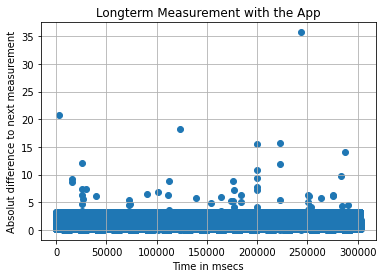

Mean: 2.0165353268407897


In [7]:
#test = app.iloc[0:10]
#print(test)
diff = app.diff(axis=0)
#print(app.index.tolist())
#print()
axis = app.index.tolist()
yaxis = diff["Ch-1"].abs().tolist()
plt.scatter(x = axis, y = yaxis)
plt.grid()
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Time in msecs")
plt.ylabel("Absolut difference to next measurement")
plt.title("Longterm Measurement with the App")
plt.savefig("DifferenceApp.png")

plt.show()
print("Mean:", diff["Ch-1"].abs().mean(axis=0))

#diff["Ch-1"].abs().plot(kind= "pie")

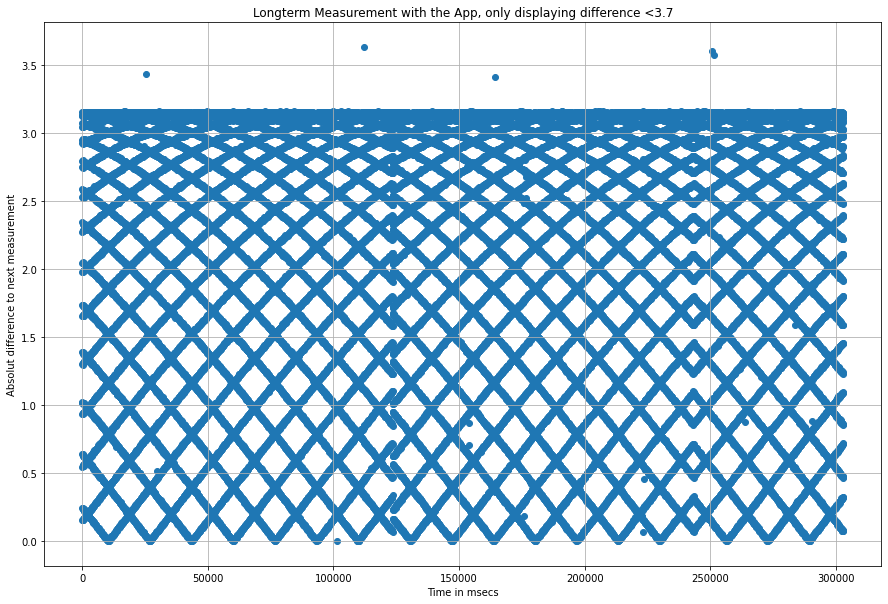

In [5]:
diff = app.diff(axis=0).abs()
#print(diff)
diff = diff[(diff <3.7).any(1)]
#print(diff)
#print(app.index.tolist())
#print()
axis = diff.index.tolist()
yaxis = diff["Ch-1"].abs().tolist()
plt.scatter(x = axis, y = yaxis)
plt.grid()
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Time in msecs")
plt.ylabel("Absolut difference to next measurement")
plt.title("Longterm Measurement with the App, only displaying difference <3.7")
plt.savefig("DifferenceAppUnderThreshold.png")

plt.show()

#df[(df > threshold).any(1)]

In [7]:
def read_clean_nRF(file, start_with_0 = False):
    df = pd.read_csv(file)
    df.drop(labels = "time", axis = "columns", inplace = True, errors= 'ignore')
    if start_with_0:
        df.rename(columns={'Unnamed: 1':'Channel 0', 'Unnamed: 2':'Channel 1', 'Unnamed: 3':'Channel 2', 'Unnamed: 4':'Channel 3', 'Unnamed: 5':'Channel 4', 'Unnamed: 6':'Channel 5'}, inplace=True )
    else:
        df.rename(columns={'Unnamed: 1':'Channel 1', 'Unnamed: 2':'Channel 2', 'Unnamed: 3':'Channel 3', 'Unnamed: 4':'Channel 4', 'Unnamed: 5':'Channel 5', 'Unnamed: 6':'Channel 6'}, inplace=True )
    
    return df



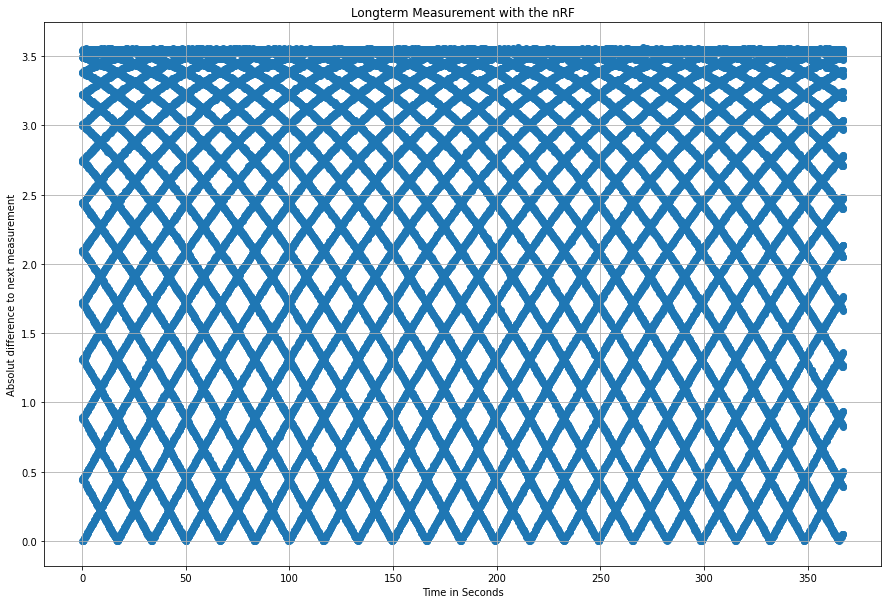

In [8]:
nRF = read_clean_nRF("LongtermTestnRF.csv")
#print(nRF)
nRF = nRF.drop(["Channel 2","Channel 3","Channel 4","Channel 5","Channel 6","Unnamed: 7"], axis=1).dropna(axis=1)
#print(nRF)
nRF = nRF.divide(2980)
#print(nRF)
#nRF.iloc[0:1000].plot(y = "Channel 1", grid = True, title = "Longtermtest nRF, Internal Reference, 5 Hz, 50 mV", marker='o', figsize = (30,6)) #, subplots = True)
#plotTraceApp(nRF, channelname=["Channel 1"], fro= 1000, to = 2000, title = "Longtermtest nRF, Internal Reference, 5 Hz, 50 mV")


diffnRF = nRF.diff(axis=0)
#print(app.index.tolist())
#print()
axisnrf = nRF.index.tolist()
yaxisnrf = diffnRF["Channel 1"].abs().tolist()
plt.scatter(x = axisnrf, y = yaxisnrf)
plt.grid()
plt.rcParams["figure.figsize"] = (15,10)
plt.xlabel("Time in Seconds")
plt.ylabel("Absolut difference to next measurement")
plt.title("Longterm Measurement with the nRF")
#plt.savefig("DifferencenRFCorrectedYAxis.png")

plt.show()


Read the csv file and assess whether a package id is missing. If it is missing, plot thta part to see is the jumps are due to that.